In [1]:
from pathlib import Path
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from model_training_process.utils import preprocess_data

Прочитаем исходные данные

In [2]:
DATA_PATH = Path('.') / 'data' / 'New_Delhi_reviews.csv'

reviews = pd.read_csv(DATA_PATH)
reviews.sample(5)

rating_review                                        review_full
39848               4  I take my 4 year old daughter here quite often...
101656              5  Food was average service was Excellent ...ambi...
115475              5  Only stopped here one night but the hospitalit...
33175               5  Our Driver stopped here on way to Agra, had no...
78980               5  Spectacular services with best hospitality wit...

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147581 entries, 0 to 147580
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating_review  147581 non-null  int64 
 1   review_full    147579 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


Посмотрим на распределение общего количества отзывов в разрезе рейтинга

In [4]:
fig = px.histogram(reviews, x='rating_review', color = 'rating_review')
fig.update_yaxes(title = 'count')
fig.show()

Как видно из распределния, основная масса отзывов пренадлежит в максимальной оценке - 5, в то время как минимум наблюдается при рейтинге -1

Напишем вспомогательную функцию для визуализации слов и их количества в нашей выборке.

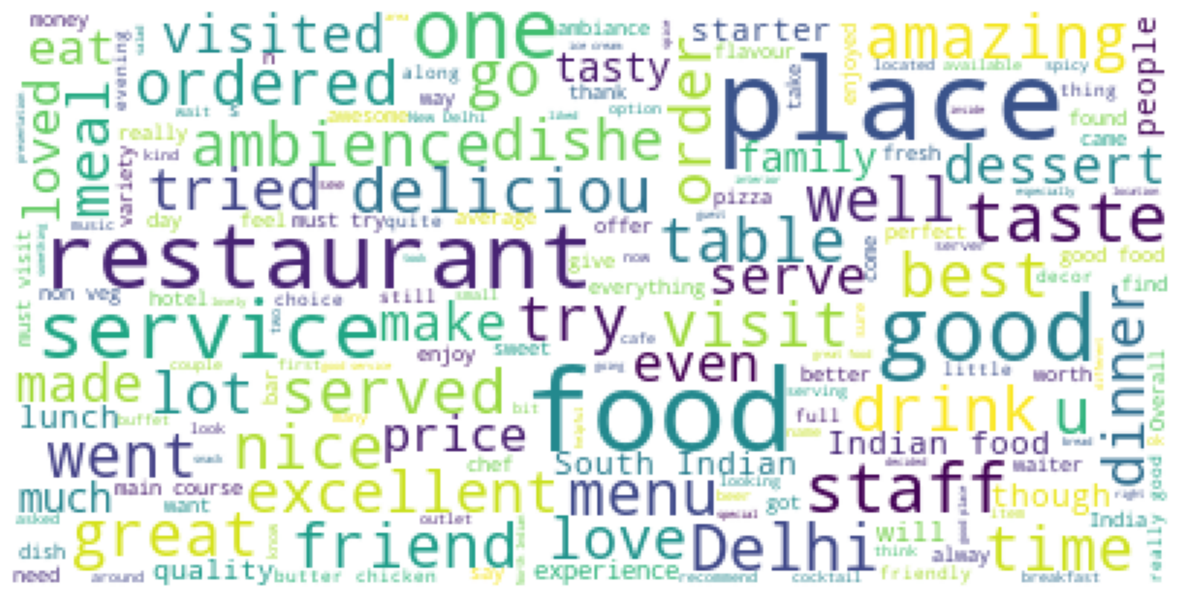

In [5]:
def plot_wordcloud(data, title = None):
    wordcloud = WordCloud(
        max_words = 200, max_font_size = 40,
        background_color = 'white', random_state = 1).generate(" ".join(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust()
    plt.imshow(wordcloud)
    plt.show()

plot_wordcloud(reviews['review_full'].dropna().values)

Как видно из визуализации в нашем тексте присутсвует очень много слов, предлогов и т.д. не играющих роли в процессе обучения, от них нужно избавиться в процессе предобработки текста.

Вычислим максимальную и среднюю длинну предложения в наших отзывах.

In [6]:
print('Max len: ', reviews['review_full'].dropna().apply(len).max())
print('Mean len: ', reviews['review_full'].dropna().apply(len).mean())

Max len:  8192
Mean len:  404.74544481260887


Таким образом мы понимаем, что есть случае когда предлодение в строке включает очень много символов и скорее всего не играет симантической роли для обучения нашей модели. Поэтому логично будет обрезать наши предложения по средней велечине, в нашем случае это ~400 символов.

Выполним очистку наших данных, которая включает удаление лишних символов, очистку текста от ненужных слов и обрезку излише длинных предложений.

In [7]:
reviews['review_full'] = preprocess_data(reviews['review_full'].dropna())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dames\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Cleaning data: 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]


In [8]:
reviews.sample(5)

rating_review                                        review_full
68290               2  fact keventers 40 outlets cause huge amazement...
92807               4  best restaurant arakashan road pahar ganj roof...
137972              5  visit rajdharam love food well stall good deli...
130178              5  first visit k3 restaurant actually late buffet...
93561               4  really good food limited seating place suited ...

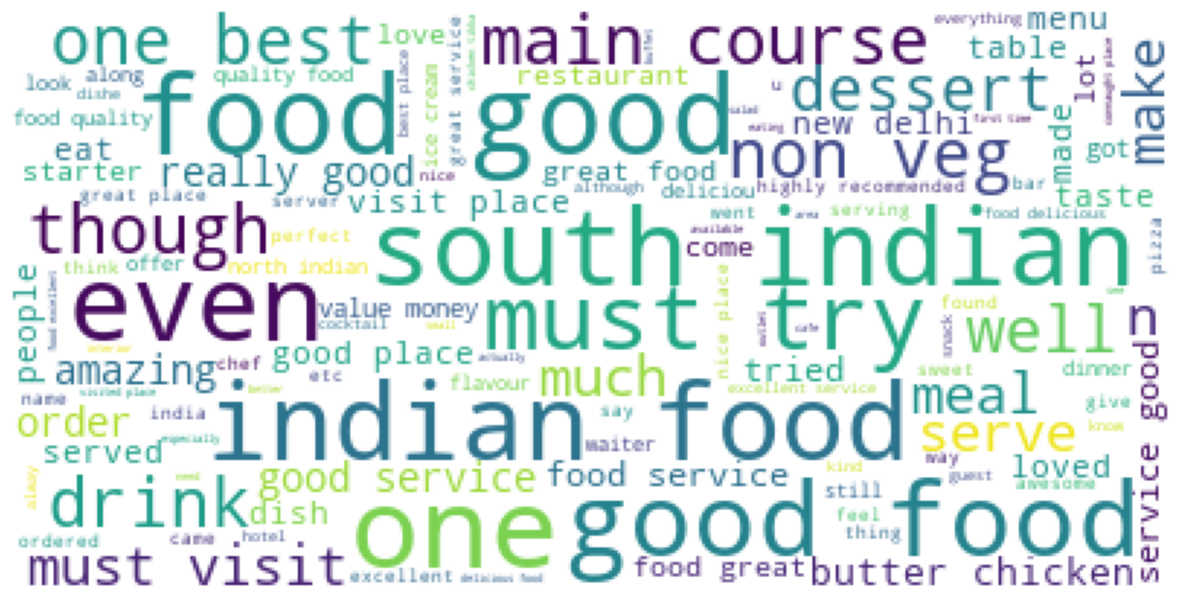

In [9]:
plot_wordcloud(reviews['review_full'].dropna().values)

Мы очистили исходные данные, теперь запустим процесс обучения модели и посмотрим какие результаты мы получим.
Исходные параметры 15 эпох, максимальная длинная 128.